# MIP
# Estudiante: Shirley Carminia Eguivar Villca

In [213]:
#Descripcion del caso
#Una empresa manufacturera de ropa dispone de  500 metros de tela , 400 botones  y 225 cierres.
#Para confeccionar chamarras necesita 1m de tela y dos botones.
#Para hacer buzos/pantalones necesita 2m de tela 1 boton y un cierre.
#La ganancia por chamarra vendida en 20 Bs y por cada pantalon 30Bs
#Cuantas prendas tendra a la venta al finalizar la confeccion?




In [216]:
#Parte 1: Definir funciones y graficar
#Parte 2:  Optimizar usando PULP

# Parte 1: Definir funciones y graficar

In [214]:
#Definiendo las funciones y graficando
# x = nro de chamarras
# y = nro  de pantalones


#restricciones
# x>=0
# 0<=y<= 225
# x+2y =500
# 2x+y =400

# Funcion Objetivo : MAXIMIZAR
# z = 20x+30y


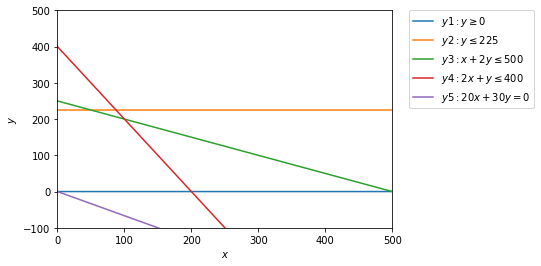

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construimos lines
# x > 0
x = np.linspace(0, 600, 2000)
# y >=0
y1 = x*0
# y <= 225
y2 = 225+(x*0)
# x + 2y <= 500 
y3 = (500-x)/2
# 2x + y <= 400
y4 = 400-2*x
# 20x + 30y = 0
y5 = (-20*x)/30


# Hacemos plot
plt.plot(x, y1, label=r'$y1: y\geq0$')
plt.plot(x, y2, label=r'$y2:y\leq225$')
plt.plot(x, y3, label=r'$y3: x + 2y \leq 500$')
plt.plot(x, y4, label=r'$y4: 2x + y \leq 400$')
plt.plot(x, y5, label=r'$y5: 20x + 30y = 0$')
plt.xlim((0, 500))
plt.ylim((-100, 500))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

#plt.plot(375, 250, 'b*', markersize=15)
# Fill feasible region
#y7 = np.minimum(y3, y4)
#y8 = np.maximum(y3, y4)
#plt.fill_between(x, 0, y8, where=y8>y1, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Parte 2:  Optimizar con PULP

In [223]:
# x = nro de chamarras
# y = nro  de pantalones


#restricciones
# x>=0
# 0<=y<= 225
# x+2y =500
# 2x+y =400

# Funcion Objetivo : MAXIMIZAR
# z = 20x+30y

In [224]:
# import the library pulp 
import pulp as p 
  
# Creamps  LP Maximization problem 
Lp_prob = p.LpProblem('Problem', p.LpMaximize)  
  
# Create problem Variables  
x = p.LpVariable("x", lowBound = 0)   # Create a variable x >= 0 
y = p.LpVariable("y", lowBound = 0)   # Create a variable y >= 0 
  
# Objective Function 
Lp_prob += 20 * x + 30 * y    
  
# Constraints: 
Lp_prob +=   x + 2 * y <= 500
Lp_prob += 2*x + y <= 400
Lp_prob += x >= 0
Lp_prob += y <= 225
  
# Display the problem 
print(Lp_prob) 
  
status = Lp_prob.solve()   # Solver 
print(p.LpStatus[status])   # The solution status 
  
# Printing the final solution 
print(p.value(x), p.value(y), p.value(Lp_prob.objective))

Problem:
MAXIMIZE
20*x + 30*y + 0
SUBJECT TO
_C1: x + 2 y <= 500

_C2: 2 x + y <= 400

_C3: x >= 0

_C4: y <= 225

VARIABLES
x Continuous
y Continuous

Optimal
100.0 200.0 8000.0
